In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("GSR_ECG_EEG_DATA.csv")

In [3]:
df

,subject_id,case_id,label_Arousal,label_Valence,Label,Labell,GSR_0,GSR_1,GSR_2,GSR_3,...,EEG_78,EEG_79,EEG_80,EEG_81,EEG_82,EEG_83,EEG_84,EEG_85,EEG_86,EEG_87
0,0,0,1,1,HAHV,3,-0.277512,-0.029699,-0.446231,0.361831,...,-0.411472,-0.619955,-0.135081,-0.132510,0.860934,0.027133,0.490970,1.337359,-0.025029,1.120726
1,0,1,1,1,HAHV,3,-0.304174,1.088844,0.251643,0.253233,...,-0.412092,0.070994,-0.053708,-0.237470,0.509355,0.026983,1.307456,0.468313,0.447794,0.319481
2,0,2,-1,1,LAHV,1,-0.273032,-1.803324,0.034562,-0.469988,...,-0.412283,0.016873,-0.077167,0.004746,0.287991,0.031422,0.590245,2.206405,0.058303,1.521349
3,0,3,1,-1,HALV,2,-0.245539,-0.498300,-0.308101,0.120249,...,-0.412052,-0.591872,-0.178766,0.820206,2.742531,0.027683,0.900226,-0.835257,0.814336,-0.882388
4,0,4,1,1,HAHV,3,-0.272976,0.069360,0.587133,-0.593375,...,-0.409223,0.136497,-0.078865,0.150075,-0.350059,0.006795,0.977215,0.468313,-0.007352,0.720103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,57,31,1,1,HAHV,3,0.986476,0.080573,-0.329449,0.415492,...,0.576199,0.299082,-0.078269,0.434553,-0.994620,0.117327,-0.894182,-0.835257,-0.065031,-0.782154
2084,57,32,1,1,HAHV,3,0.980860,0.153492,-0.289178,0.464089,...,0.032018,0.313810,-0.080094,0.386072,-0.994620,0.085760,-0.981835,-0.835257,-0.064583,-0.882388
2085,57,33,1,1,HAHV,3,0.966261,2.163938,0.451337,0.693286,...,0.801525,0.282263,-0.076024,1.096645,-0.994620,0.379750,-1.083207,-0.835257,-0.064545,-0.882388
2086,57,34,1,-1,HALV,2,1.019600,1.637922,0.265456,0.034017,...,-0.131861,0.398485,-0.026769,0.405750,-0.994620,-0.428943,-0.889847,-0.835257,-0.063725,-0.882388


In [4]:
# distributing the dataset into two components X and Y
X = df.iloc[:, 6:105].values

In [5]:
X

array([[-0.27751245, -0.02969867, -0.44623097, ...,  0.94661264,
         0.07743937,  0.8189292 ],
       [-0.30417424,  1.08884353,  0.25164327, ...,  0.58898326,
         0.72115833,  0.48159414],
       [-0.27303202, -1.80332428,  0.03456197, ...,  1.30424203,
         0.24581004,  1.15626427],
       ...,
       [ 0.96626112,  2.16393804,  0.45133677, ..., -0.84153429,
        -0.07109833, -0.86774612],
       [ 1.01959974,  1.63792188,  0.26545592, ..., -0.84153429,
        -0.06958129, -0.86774612],
       [ 0.98258696, -0.2357149 , -0.27626619, ..., -0.84153429,
        -0.06852557, -0.86774612]])

In [6]:
y = df.iloc[:, 5].values

In [7]:
y

array([3, 3, 1, ..., 3, 2, 3], dtype=int64)

In [8]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X = sc.fit_transform(X)

In [9]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


#for i in range(0,100):

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
#pca = PCA(n_components = 50)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
classifier = DecisionTreeClassifier(random_state=0, max_depth=2)
classifier.fit(X_train, y_train)
#classifier = SVC(kernel='linear')
#classifier.fit(X_train, y_train)    
y_pred = classifier.predict(X_test)
    
accuracy = accuracy_score(y_test, y_pred)
    #print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
precision = precision_score(y_test, y_pred,average='micro')
    #print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='micro')
    #print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred,  average='micro')
print(accuracy,",",precision,",",recall,",",f1,",")

0.49760765550239233 , 0.49760765550239233 , 0.49760765550239233 , 0.49760765550239233 ,


In [10]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   2,  26],
       [  0,   0,   6,  60],
       [  0,   0,  13, 207],
       [  0,   0,  14, 299]], dtype=int64)

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred, average='micro')) 
print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1:%.3f'% f1_score(y_test, y_pred,  average='micro'))

Precision: 0.498
Recall: 0.498
Accuracy: 0.498
F1:0.498


In [12]:
import numpy as np
cm=np.transpose( np.transpose(cm) / cm.astype(np.float).sum(axis=1) )

In [13]:
cm

array([[0.        , 0.        , 0.07142857, 0.92857143],
       [0.        , 0.        , 0.09090909, 0.90909091],
       [0.        , 0.        , 0.05909091, 0.94090909],
       [0.        , 0.        , 0.04472843, 0.95527157]])

In [14]:
cm = pd.DataFrame(cm,
                     index = ['LAHV','LALV','HAHV','HALV'], 
                     columns = ['LAHV','LALV','HAHV','HALV'])

In [15]:
cm

,LAHV,LALV,HAHV,HALV
LAHV,0.0,0.0,0.071429,0.928571
LALV,0.0,0.0,0.090909,0.909091
HAHV,0.0,0.0,0.059091,0.940909
HALV,0.0,0.0,0.044728,0.955272


In [16]:
y_test

array([3, 2, 2, 1, 2, 3, 2, 3, 2, 3, 3, 2, 3, 1, 2, 3, 3, 3, 2, 3, 1, 0,
       2, 3, 2, 3, 3, 2, 3, 1, 1, 3, 2, 2, 3, 3, 2, 3, 1, 3, 3, 2, 2, 1,
       2, 0, 1, 0, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 2, 3, 2, 3, 3, 2, 0, 3, 3, 3, 1, 3, 2, 3, 3, 1, 3, 2, 3,
       2, 2, 2, 1, 3, 3, 3, 3, 3, 2, 2, 3, 1, 1, 3, 3, 2, 2, 2, 2, 3, 2,
       3, 3, 2, 3, 3, 2, 3, 3, 1, 2, 3, 1, 3, 0, 2, 3, 3, 3, 3, 2, 2, 2,
       3, 3, 0, 3, 2, 0, 2, 2, 3, 2, 1, 3, 3, 3, 3, 2, 3, 3, 2, 0, 3, 3,
       3, 1, 2, 2, 3, 2, 2, 3, 3, 2, 0, 1, 2, 3, 0, 3, 1, 2, 3, 3, 2, 0,
       2, 2, 3, 3, 3, 3, 0, 3, 1, 2, 3, 2, 2, 3, 2, 3, 1, 3, 2, 1, 3, 3,
       2, 1, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 0, 2, 1, 2, 3, 3, 2, 2, 2, 0,
       3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3,
       3, 2, 3, 0, 3, 2, 3, 3, 3, 3, 1, 2, 2, 1, 2, 1, 2, 2, 3, 2, 3, 3,
       2, 2, 3, 2, 3, 2, 2, 0, 1, 2, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 3, 2,

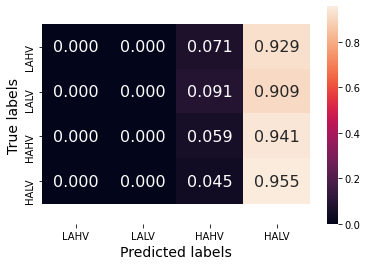

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 16})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.45, top-0.4)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
#plt.figure(figsize=(10,7))
#plt.savefig("hmwscalingall.png", dpi=300)
plt.show()